## 4.4 감성분석

감성분석은 텍스트에 나타난 긍정, 부정요소를 정량화하는 작업으로 다음과 같은 일들을 수행한다.
* 긍정과 부정의 대상이 되는 단어 또는 개체 추출
* 추출된 단어 속에 나타난 의견, 평가, 태도 등의 특징적 양상을 정량화된 자료로 제시
* 감성분석의 목적은 텍스트간 비교 우위를 밝혀 상대적 비교를 하는 것에 있음
  
감성 분석의 종류는 크게 `사전 기반 감성 분석`, `지도 기계학습기반 감성 분석` 두 가지로 나뉜다.

### 4.4.1 사전 기반 감성 분석

감성 사전을 이용하여 텍스트에 담긴 감성을 분석한다. 감성 사전은 단어와 감성지표(긍정, 부정 정도)를 대응시켜놓은 자료이다. 사전 기반 분석에서는 감성 사전의 이용이 필수적이다.
  
< 자주 쓰이는 감성 사전(영어) >
* `AFINN` : Finn Arup Nielsen이 2009 ~ 2011년에 직접 수집한 감성 어휘들에 대해 -5~+5의 점수를 부여한 사전. 2477개의 감성어가 수록되어있다.
* `EmoLex` : 단어들을 긍정, 부정뿐만 아니라 공포, 기대, 신뢰, 놀람, 슬픔, 기쁨, 역겨움과 같은 8가지 감정으로 분류함. 인간의 정서 정보를 더욱 풍부하게 반영한다. 14,182개의 감성어를 보유하고 있다.
* `Bing Liu lexicon` : 감성어들을 긍정, 부정으로만 분류하며 점수지표는 없음. 6800여개의 감성어가 있으며 지속적으로 업데이트 되고 있음.
* `SentiWordNet` : 단어들을 긍정, 부정, 중립으로 분류. 파이썬 NLTK패키지에 있어 사용이 간편함.
  
한국어 감성 분석의 경우 영어로 번역한 후 감성 분석을 수행하거나 한국어 감성 사전을 이용한다.

< 한국어 감성 사전 >
* `KOSAC` : 개발자의 동의를 얻어 사용 가능 http://word.snu.ac.kr/kosac/index.php
* `EmoLex` : 14,182개의 단어에 대해 영어 뿐만 아니라 한국어 포함 105개국 언어에 대한 감성 사전을 제공한다.

***

**<예제> 영화 리뷰 데이터 감성 분석**  
  
> <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>

영화 사이트인 IMDB의 리뷰데이터를 이용해서 감성 분석을 수행한다. 데이터는 위 링크에서 다운받을 수 있다. 해당 데이터는 5만건의 각 영화리뷰에 대해 긍정인지 부정인지 라벨링이 되어있다.  
  
우선 필요한 패키지들을 import 한다.

In [22]:
import pandas as pd
from afinn import Afinn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [39]:
review = pd.read_csv('E:\\text-mining\\IMDB\IMDB-Dataset.csv', engine="python")
review.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


***

**파일을 불러올 때 다음 세 가지 요소를 지키지 않았을 경우 오류가 발생했음.**
* 데이터의 경로 구분자에 \를 두개 사용하지 않고 하나만 사용했을 경우  
  ex) `'E:\text-mining\IMDB\IMDB-Dataset.csv'`
* 파일 이름에 확장자 `.csv`를 붙이지 않은 경우  
  ex) `pd.read_csv('E:\\text-mining\\IMDB\IMDB-Dataset', engine="python")`
* `read_csv()` 파라미터에 `engine="python"`을 넣지 않은 경우  
  ex) `pd.read_csv('E:\\text-mining\\IMDB\IMDB-Dataset.csv')`

***

**Afinn으로 감성분석하기**

In [52]:
afinn = Afinn()
pos_review = review['review'][1]
neg_review = review['review'][3]
print(afinn.score(pos_review))
print(afinn.score(neg_review))

13.0
-8.0


Afinn 감성 사전을 이용한 감성 분석 결과이다. 긍정리뷰에 해당하는 두 번째 리뷰는 13점이고 부정리뷰에 해당하는 네 번째 리뷰는 -8점이 산출되었다. Afinn 감성 사전을 이용할 경우 라이브러리 자체가 텍스트를 전처리해주고 감성점수를 산출하므로 특별한 전처리 과정이 필요 없다.

***

**EmoLex로 감성분석하기**
  
EmoLex 감성 사전은 다음 링크에서 다운받을 수 있다. 논문, 다국어 감성사전 등을 포함한 자료라 파일은 100mb이나 영어 분석에 필요한 감성 사전은 2mb정도이다. 해당 사전의 파일 이름은 **NRC-Emotion-Lexicon-Wordlevel-v0.92** 이다. 버전에 따라 버전명은 달라질 수 있다.

>http://sentiment.nrc.ca/lexicons-for-research/ 에서 **THE SENTIMENT AND EMOTION LEXICONS** 클릭

필요한 패키지는 앞에서 import 했으므로 EmoLex 분석에 필요한 감성 사전을 먼저 로드한다. 

In [62]:
NRC = pd.read_csv("E:\\text-mining\\NRC-Sentiment-Emotion-Lexicons\\NRC-Emotion-Lexicon-v0.92\\NRC-Emotion-Lexicon-Wordlevel-v0.92.txt",
                  engine="python", header=None, sep="\t")
NRC.head(20)

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


NRC 감성사전은 등록된 14,182개의 각 단어들에 대해 `긍정, 부정 + 8가지의 감정` 총 10가지 척도에 대해 0 또는 1로 라벨링되어있다. 따라서 해당 사전은 약 14만 1820개의 행으로 이루어져 있다. 하나의 단어마다 10개씩의 행으로 이루어진 데이터인 셈이다.

In [63]:
NRC = NRC[(NRC != 0).all(1)]
NRC.head(10)

,0,1,2
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
35,abandoned,negative,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1


감성분석에 필요한 단어들은 1로 라벨링 되어있는 것들이므로 Dataframe.all() 메서드를 통해 유의미한 라벨들만 추출한다. all()의 파라미터로 0을 입력할 경우 위아래로 탐색하며 1을 입력할 경우 좌우로 탐색한다.

In [64]:
# 인덱스 번호 리셋
NRC = NRC.reset_index(drop=True)
NRC.head(10)

,0,1,2
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1
5,abandoned,fear,1
6,abandoned,negative,1
7,abandoned,sadness,1
8,abandonment,anger,1
9,abandonment,fear,1


positive        14
trust            4
anticipation     3
joy              2
fear             2
surprise         1
disgust          1
negative         1
sadness          1
dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


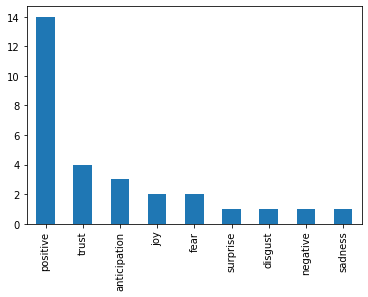

In [66]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

raw = pos_review.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # 불용어 제거
match_words = [x for x in stopped_tokens if x in list(NRC[0])] # 사전과 매칭

emotion=[]
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result1 = pd.Series(emotion).value_counts()

print(sentiment_result1, sentiment_result1.plot.bar())

위는 긍정 리뷰에 대해 EmoLex 분석을 한 결과이다. 부정 리뷰에 대해서도 마찬가지 과정을 수행한다.

negative        5
sadness         4
anticipation    3
fear            3
positive        2
anger           2
trust           2
surprise        2
disgust         1
joy             1
dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


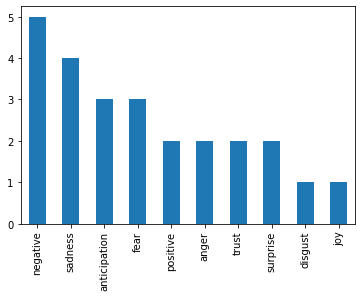

In [68]:
raw = neg_review.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # 불용어 제거
match_words = [x for x in stopped_tokens if x in list(NRC[0])] # 사전과 매칭

emotion=[]
for i in match_words:
    temp = list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result2 = pd.Series(emotion).value_counts()

print(sentiment_result2, sentiment_result2.plot.bar())

### 4.4.2 지도 기계학습기반 감성 분석

머신러닝의 종류 중 하나인 지도학습(supervised learning)에 해당하는 기법들을 감성 분석에 적용하는 것을 말한다. 지도학습은 이미 라벨링이 완료된 훈련 데이터를 필요로 하며 주로 쓰이는 알고리즘은 다음과 같다.
* `서포트 벡터 머신`, `회귀 분석`, `신경망`, `나이브 베이즈 분류`, `의사결정나무`  
  
즉, 훈련 데이터를 통해 생성한 모델이 감성 사전의 역할을 하는 것이다.
  
감성 분석에 지도학습을 적용하려면 훈련 데이터와 테스트 데이터의 성격이 동일해야한다. 텍스트의 주제, 성격에 따라 유사한 어구라도 긍정 및 부정 여부가 달라질 수 있기 때문이다.

***

**<예제> 영화 리뷰 데이터 감성 분석**  
  
마찬가지로 IMDB 데이터를 이용한다. IMDB 리뷰 데이터는 긍정, 부정 라벨링이 완료된 데이터이므로 지도학습 기법을 적용하기에 최적화되어있다. 우선 필요한 패키지들을 import하고 리뷰 데이터를 로드한다.

In [78]:
import pandas as pd
from afinn import Afinn
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

review = pd.read_csv('E:\\text-mining\\IMDB\IMDB-Dataset.csv', engine="python")

x에는 feature, y에는 label을 설정하고 train data와 test data로 분할한다.

In [77]:
x = review['review']
y = review['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify=y,
                                                    test_size=0.2)

print(x_train.shape, x_test.shape) # 훈련세트, 테스트세트 비율 확인
np.unique(y_train, return_counts=True) # 훈련세트의 타깃(라벨) 확인

(40000,) (10000,)


(array(['negative', 'positive'], dtype=object),
 array([20000, 20000], dtype=int64))

훈련 데이터와 테스트 데이터가 4:1로 나뉘었다. 훈련 데이터 안에서 긍정리뷰와 부정리뷰는 정확히 절반씩이다.

In [91]:
stop_words = stopwords.words('english')

# TF-IDF 가중치를 통해 문서-단어 매트릭스로 바꾸기
vect = TfidfVectorizer(stop_words=stop_words).fit(x_train)
x_train_vectorized = vect.transform(x_train)

x_train_vectorized

<40000x94476 sparse matrix of type '<class 'numpy.float64'>'
	with 3918551 stored elements in Compressed Sparse Row format>

불용어를 제거한 뒤 TF-IDF 가중치를 이용해 리뷰에 해당하는 column을 문서-단어 매트릭스로 바꾼다.

In [94]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model = LogisticRegression()
model.fit(x_train_vectorized, y_train)
print(model.score(x_train_vectorized, y_train))

0.934225


사이킷런으로 로지스틱 회귀를 수행한 결과 훈련데이터에서 93%의 정확도를 보였다.

In [96]:
print(model.score(vect.transform(x_test), y_test))

0.8936


테스트 데이터에서는 89%이다.

In [100]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train_vectorized, y_train)
print(clf.score(x_train_vectorized, y_train))

1.0


의사결정나무로 훈련한 결과이다. 100%가 나와버렸다(?)

In [101]:
print(clf.score(vect.transform(x_test), y_test))

0.724


테스트셋에서 훈련데이터 만큼의 성능을 보여주지 못하는 것으로 보아 의사결정나무로 훈련시킨 모델은 과적합된 것으로 판단된다.